In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import pprint
import sqlite3 as sql

In [19]:
conn= sql.connect('C:/Users/Yoan Vicente/Documents/Application methodes/Automobilistes/conducteurs.db')
cursor = cn.cursor()
cursor.execute("SELECT * FROM Driver")

In [74]:
cursor.execute("SELECT Driver, Name, BirthYear FROM Driver")
driver_data = cursor.fetchall()

cursor.execute("SELECT Year, Winner FROM Race")
race_data = cursor.fetchall()

In [71]:
query = """
SELECT 
    Driver.Name, 
    (Race.Year - Driver.BirthYear) AS Age_When_Won
FROM 
    Driver
JOIN 
    Race
ON 
    Driver.Driver = Race.Winner
"""

In [72]:
df = pd.read_sql_query(query, conn)
df

,Name,Age_When_Won
0,Emerson Fittipaldi,26
1,Jackie Stewart,32
2,James Hunt,29
3,Jackie Stewart,29
4,Clay Regazzoni,36
...,...,...
982,Max Verstappen,20
983,Lewis Hamilton,32
984,Lewis Hamilton,32
985,Lewis Hamilton,32


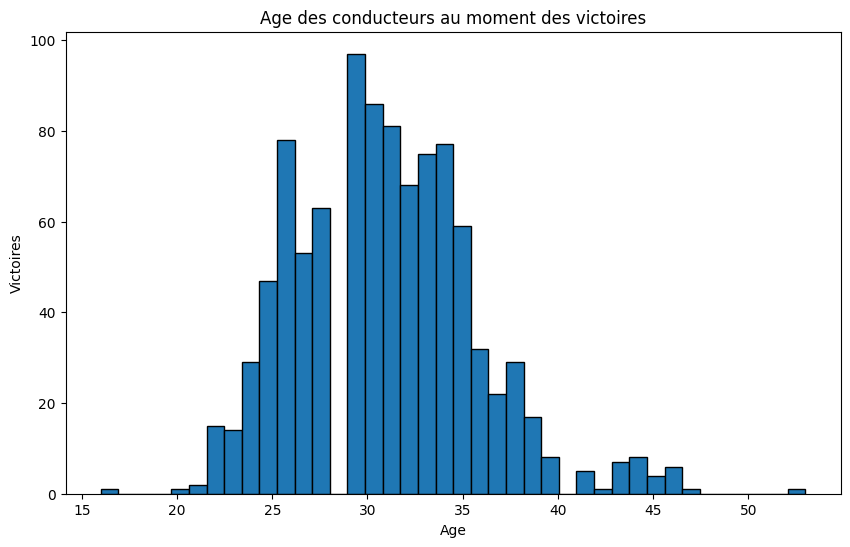

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age_When_Won'], bins=40, edgecolor='black')
plt.title('Age des conducteurs au moment des victoires')
plt.xlabel('Age')
plt.ylabel('Victoires')
plt.show()

In [75]:
df[df['Age_When_Won'] > 50]

,Name,Age_When_Won
140,Luigi Fagioli,53


In [78]:
conn.close

<function Connection.close()>